### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
# %load_ext autoreload


# %autoreload
# %reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [83]:
# Import the pipeline creation object
import pandas as pd
import numpy as np
import cbgt as cbgt
import pipeline_creation as pl_creat
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

<module 'postprocessing_helpers' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [34]:
# Choose the experiment
experiment_choice = "n-choice"
number_of_choices = 2
# Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

# how many simulations do you want to run ? each simulation is executed as a seperate thread

num_sims = 1

num_cores = 7
# set a seed
import time
np.random.seed(int(time.time()))
#seed = np.random.choice(np.random.randint(0,9999999,100),1)[0]
seed = 8867366
print(seed)


in choose pipeline
in reward pipeline
8867366


In [35]:

# Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"


# Running the pipeline

### 1. Default values of environment variable

In [36]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
configuration = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None, # default = 600ms
    'thalamic_threshold': None, # default 30sp/s
    'movement_time':None,# #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout':None, #wait for a choice to be made, default 1000, 
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': None,#pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': None, #pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
        'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :None,
    'Q_support_params': None,#pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df_set':pd.DataFrame([[0.5, 0.5]],columns=["left","right"]), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [1,"exact"], #frequency of changepoints and type of change points (exact or poisson) (generateepochs.py)
    'conflict': (0.7, 0.3), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.8, # 3 instead? how much stimulus the LIP gets at maximum
    'corticostriatal_plasticity_present':True, # whether plasticity is on or "off" at corticostriatal synapses
    'record_variables':["weight","optogenetic_input"],#"optogenetic_input"],
    'opt_signal_present':False,
    'opt_signal_probability':[1], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude':-0.5, # ampitude of the stop signal over base line
    'opt_signal_onset':10., # in ms
    'opt_signal_duration':500.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["D1STR"],
    'sustainedfraction':0.7
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


### Run the simulation - 1 thread with the environment variable

In [37]:
# pl.modulelist

In [38]:
results = cbgt.ExecutionManager(cores=num_cores).run([pl]*num_sims,[configuration]*num_sims)


SpawnThreadManagers <backend.Pipeline object at 0x7f76585c5490>
(worker pid=1366310) in choose pipeline
(worker pid=1366310) change points: [0 1 2 2]
(worker pid=1366310) conflict (0.7, 0.3)
(worker pid=1366310) conflict (0.7, 0.3)
(worker pid=1366310) sum 1.0
(worker pid=1366310) n_prob_trials [0, 0]
(worker pid=1366310) calc_rew    left  right
(worker pid=1366310) 0   0.0    0.0
(worker pid=1366310) reward_list    left  right
(worker pid=1366310) 0   0.0    0.0
(worker pid=1366310) conflict (0.7, 0.3)
(worker pid=1366310) sum 1.0
(worker pid=1366310) n_prob_trials [0, 0]
(worker pid=1366310) calc_rew 
(worker pid=1366310) in choose pipeline
(worker pid=1366310) change points: [0 1 2 2]
(worker pid=1366310) conflict (0.7, 0.3)
(worker pid=1366310) conflict (0.7, 0.3)
(worker pid=1366310) sum 1.0
(worker pid=1366310) n_prob_trials [0, 0]
(worker pid=1366310) calc_rew    left  right
(worker pid=1366310) 0   0.0    0.0
(worker pid=1366310) reward_list    left  right
(worker pid=1366310) 

(worker pid=1366310) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=1366310)   Q_df = Q_df.append(
(worker pid=1366310) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=1366310)   Q_df = Q_df.append(
(worker pid=1366310) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=1366310)   Q_df = Q_df.append(
(worker pid=1366310) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=1366310)   Q_df

(worker pid=1366310) agent.opt_popids [6 7]
(worker pid=1366310) agent.opt_popids [6 7]
(worker pid=1366310) phasetimer 250
(worker pid=1366310) gateFRs [26.66666667 30.22222222]
(worker pid=1366310) thresholds_crossed [1]
(worker pid=1366310) phasetimer 250
(worker pid=1366310) gateFRs [26.66666667 30.22222222]
(worker pid=1366310) thresholds_crossed [1]
(worker pid=1366310) trial_num 0
(worker pid=1366310) chosen_action right
(worker pid=1366310) scaled dopamine signal -40.0
(worker pid=1366310) trial_num 0
(worker pid=1366310) chosen_action right
(worker pid=1366310) scaled dopamine signal -40.0
(worker pid=1366310) phasetimer 348
(worker pid=1366310) gateFRs [30.44444444 20.22222222]
(worker pid=1366310) thresholds_crossed [0]
(worker pid=1366310) phasetimer 348
(worker pid=1366310) gateFRs [30.44444444 20.22222222]
(worker pid=1366310) thresholds_crossed [0]
(worker pid=1366310) trial_num 1
(worker pid=1366310) chosen_action left
(worker pid=1366310) scaled dopamine signal -40.0
(

In [39]:
# List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'corticostriatal_plasticity_present', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'sustainedfraction', 'par', 'popconstruct', 'interface', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'opt_df', 'opt_channels_df', 'opt_amplitude_df', 'opt_onset_df', 'opt_duration_df', 'opt_populations_df', '

In [40]:
results[0]['meaneff_GABA']

,GPi,GPi,STN,STN,GPe,GPe,D1STR,D1STR,D2STR,D2STR,Cx,Cx,Th,Th,FSI,CxI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STN,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STN,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPe,0.058`,0.0`,0.35`,0.0`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPe,0.0`,0.058`,0.0`,0.35`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,0.0`,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`


In [41]:
results[0]['conflict']

(0.7, 0.3)

In [42]:
results[0]['Q_df']

,left,right
0,0.50,0.50
0,0.50,0.45
0,0.45,0.45
0,0.45,0.45


In [43]:
experiment_choice

'n-choice'

In [44]:
#Extract all the relevant dataframes
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed,experiment_choice)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = Q_df_local.append(rew_df)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(chosen_action)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(block)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf = perf.append({'%_rewarded_actio

In [45]:
results[0]['popfreqs']

,GPi_left,GPi_right,STN_left,STN_right,GPe_left,GPe_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,78.222222,67.555556,26.177778,23.266667,60.088889,62.933333,2.222222,2.888889,5.555556,3.555556,0.000000,0.000000,4.444444,5.333333,8.000000,0.806452,0
1,78.444444,69.111111,26.155556,23.311111,60.155556,62.666667,2.444444,2.888889,5.555556,3.333333,0.000000,0.000000,4.222222,5.333333,8.000000,0.806452,1
2,77.555556,69.555556,26.177778,23.422222,60.400000,63.022222,2.444444,2.666667,5.111111,3.111111,0.000000,0.000000,4.222222,5.111111,8.000000,0.896057,2
3,75.777778,69.777778,26.133333,23.466667,60.600000,62.888889,2.444444,2.666667,5.333333,3.333333,0.000000,0.000000,4.444444,5.111111,8.222222,0.896057,3
4,76.444444,69.111111,25.844444,23.333333,60.777778,62.777778,2.444444,2.444444,5.333333,3.555556,0.000000,0.000000,4.444444,4.666667,8.222222,0.896057,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,62.222222,60.222222,25.511111,27.288889,58.955556,59.000000,5.555556,6.444444,5.777778,6.888889,1.225490,0.735294,10.666667,12.888889,9.111111,1.433692,4151
4152,61.555556,60.000000,25.533333,27.111111,58.977778,59.044444,5.333333,6.444444,6.000000,6.888889,1.307190,0.735294,10.666667,13.111111,8.888889,1.433692,4152
4153,62.000000,60.444444,25.488889,26.755556,58.200000,59.022222,5.555556,6.444444,6.222222,6.888889,1.307190,0.653595,10.444444,13.333333,8.888889,1.433692,4153
4154,62.000000,59.555556,25.488889,26.644444,57.777778,59.288889,5.555556,5.777778,6.222222,6.888889,1.388889,0.653595,10.444444,13.333333,8.888889,1.433692,4154


In [46]:
# firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed,n_trials,volatility,volatility_type,conflict
0,0,GPi_left,78.222222,GPi,left,8867366_0,3.0,1,exact,"(0.7, 0.3)"
1,1,GPi_left,78.444444,GPi,left,8867366_0,3.0,1,exact,"(0.7, 0.3)"
2,2,GPi_left,77.555556,GPi,left,8867366_0,3.0,1,exact,"(0.7, 0.3)"
3,3,GPi_left,75.777778,GPi,left,8867366_0,3.0,1,exact,"(0.7, 0.3)"
4,4,GPi_left,76.444444,GPi,left,8867366_0,3.0,1,exact,"(0.7, 0.3)"
...,...,...,...,...,...,...,...,...,...,...
66491,4151,CxI_common,1.433692,CxI,common,8867366_0,3.0,1,exact,"(0.7, 0.3)"
66492,4152,CxI_common,1.433692,CxI,common,8867366_0,3.0,1,exact,"(0.7, 0.3)"
66493,4153,CxI_common,1.433692,CxI,common,8867366_0,3.0,1,exact,"(0.7, 0.3)"
66494,4154,CxI_common,1.433692,CxI,common,8867366_0,3.0,1,exact,"(0.7, 0.3)"


In [47]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,0.0,33.333333,right,left,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
1,0.0,33.333333,left,right,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
2,0.0,33.333333,none,right,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control


In [48]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

nuc_list ['D1-left' 'D2-left' 'D1-right' 'D2-right']
ind_list [[0 0 1 0]
 [0 1 1 1]]


In [49]:
recorded_variables['weight']

,weights,trials,nuclei,seed
0,0.014385,0,D1-left,8867366_0
1,0.009330,1,D1-left,8867366_0
0,0.018785,0,D2-left,8867366_0
1,0.028340,1,D2-left,8867366_0
0,0.009593,0,D1-right,8867366_0
1,0.004876,1,D1-right,8867366_0
0,0.025798,0,D2-right,8867366_0
1,0.034848,1,D2-right,8867366_0


In [50]:
# recorded_variables['optogenetic_input']

<AxesSubplot:xlabel='trials', ylabel='weights'>

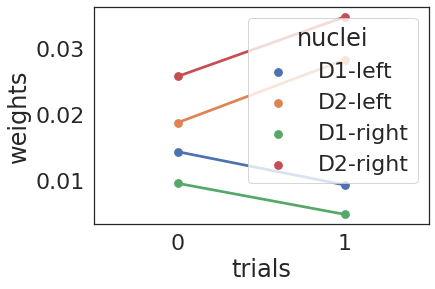

In [51]:
import seaborn as sns
import pylab as pl
sns.pointplot(x="trials",y="weights",hue="nuclei",data=recorded_variables['weight'])


<AxesSubplot:xlabel='Time(ms)', ylabel='D1STR_left'>

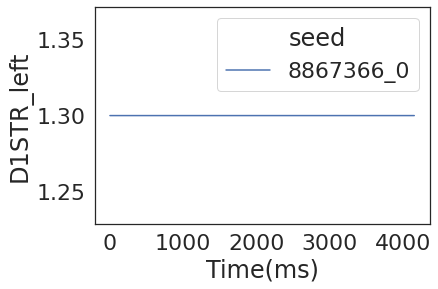

In [52]:
pl.figure()
sns.lineplot(x="Time(ms)",y="D1STR_left",data=recorded_variables['optogenetic_input'],hue='seed')

In [53]:
# Relevant reward_dataframe
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,volatility_type,conflict,condition
0,0,4,0,left,0.50,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
1,1,5,1,left,0.50,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
2,2,6,2,left,0.45,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
3,3,7,3,left,0.45,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
4,4,8,0,right,0.50,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
5,5,9,1,right,0.45,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
6,6,10,2,right,0.45,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
7,7,11,3,right,0.45,Q_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
8,0,0,0,right,0.00,reward_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
9,1,1,1,right,0.00,reward_df,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control


In [54]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,0.0,33.333333,right,left,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
1,0.0,33.333333,left,right,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control
2,0.0,33.333333,none,right,8867366_0,3.0,1,exact,"(0.7, 0.3)",Control


In [55]:
# Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0    252
1    251
2    250
dtype: object

In [56]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,250,250,502,502,left,0.0
1,left,1103,1451,348,599,1702,right,0.0
2,none,2303,3304,1001,1251,3554,right,0.0


In [57]:
# Check the Q-values data frame
results[0]['Q_df']

,left,right
0,0.50,0.50
0,0.50,0.45
0,0.45,0.45
0,0.45,0.45


In [58]:
# postfix = "weak_GPi_inh"
postfix = ""

In [59]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+postfix+'_'+str(seed)+'.pickle',['popfreqs','popdata','Q_support_params','d1','d2','dpmns','datatables'])


In [60]:
firing_rates[0].to_csv(data_dir+"firing_rates_"+postfix+".csv")
reward_q_df[0].to_csv(data_dir+"reward_df_"+postfix+".csv")
performance.to_csv(data_dir+"performance_"+postfix+".csv")
rt_dist.to_csv(data_dir+"rt_dist_"+postfix+".csv")
total_performance.to_csv(data_dir+"total_performance_"+postfix+".csv")

In [61]:
reward_q_df

[    level_0  index  Trials variable  value      data_type       seed  \
 0         0      4       0     left   0.50           Q_df  8867366_0   
 1         1      5       1     left   0.50           Q_df  8867366_0   
 2         2      6       2     left   0.45           Q_df  8867366_0   
 3         3      7       3     left   0.45           Q_df  8867366_0   
 4         4      8       0    right   0.50           Q_df  8867366_0   
 5         5      9       1    right   0.45           Q_df  8867366_0   
 6         6     10       2    right   0.45           Q_df  8867366_0   
 7         7     11       3    right   0.45           Q_df  8867366_0   
 8         0      0       0    right   0.00      reward_df  8867366_0   
 9         1      1       1    right   0.00      reward_df  8867366_0   
 10        2      2       2    right   0.00      reward_df  8867366_0   
 11        3      3       0     left   0.00      reward_df  8867366_0   
 12        4      4       1     left   0.00      re

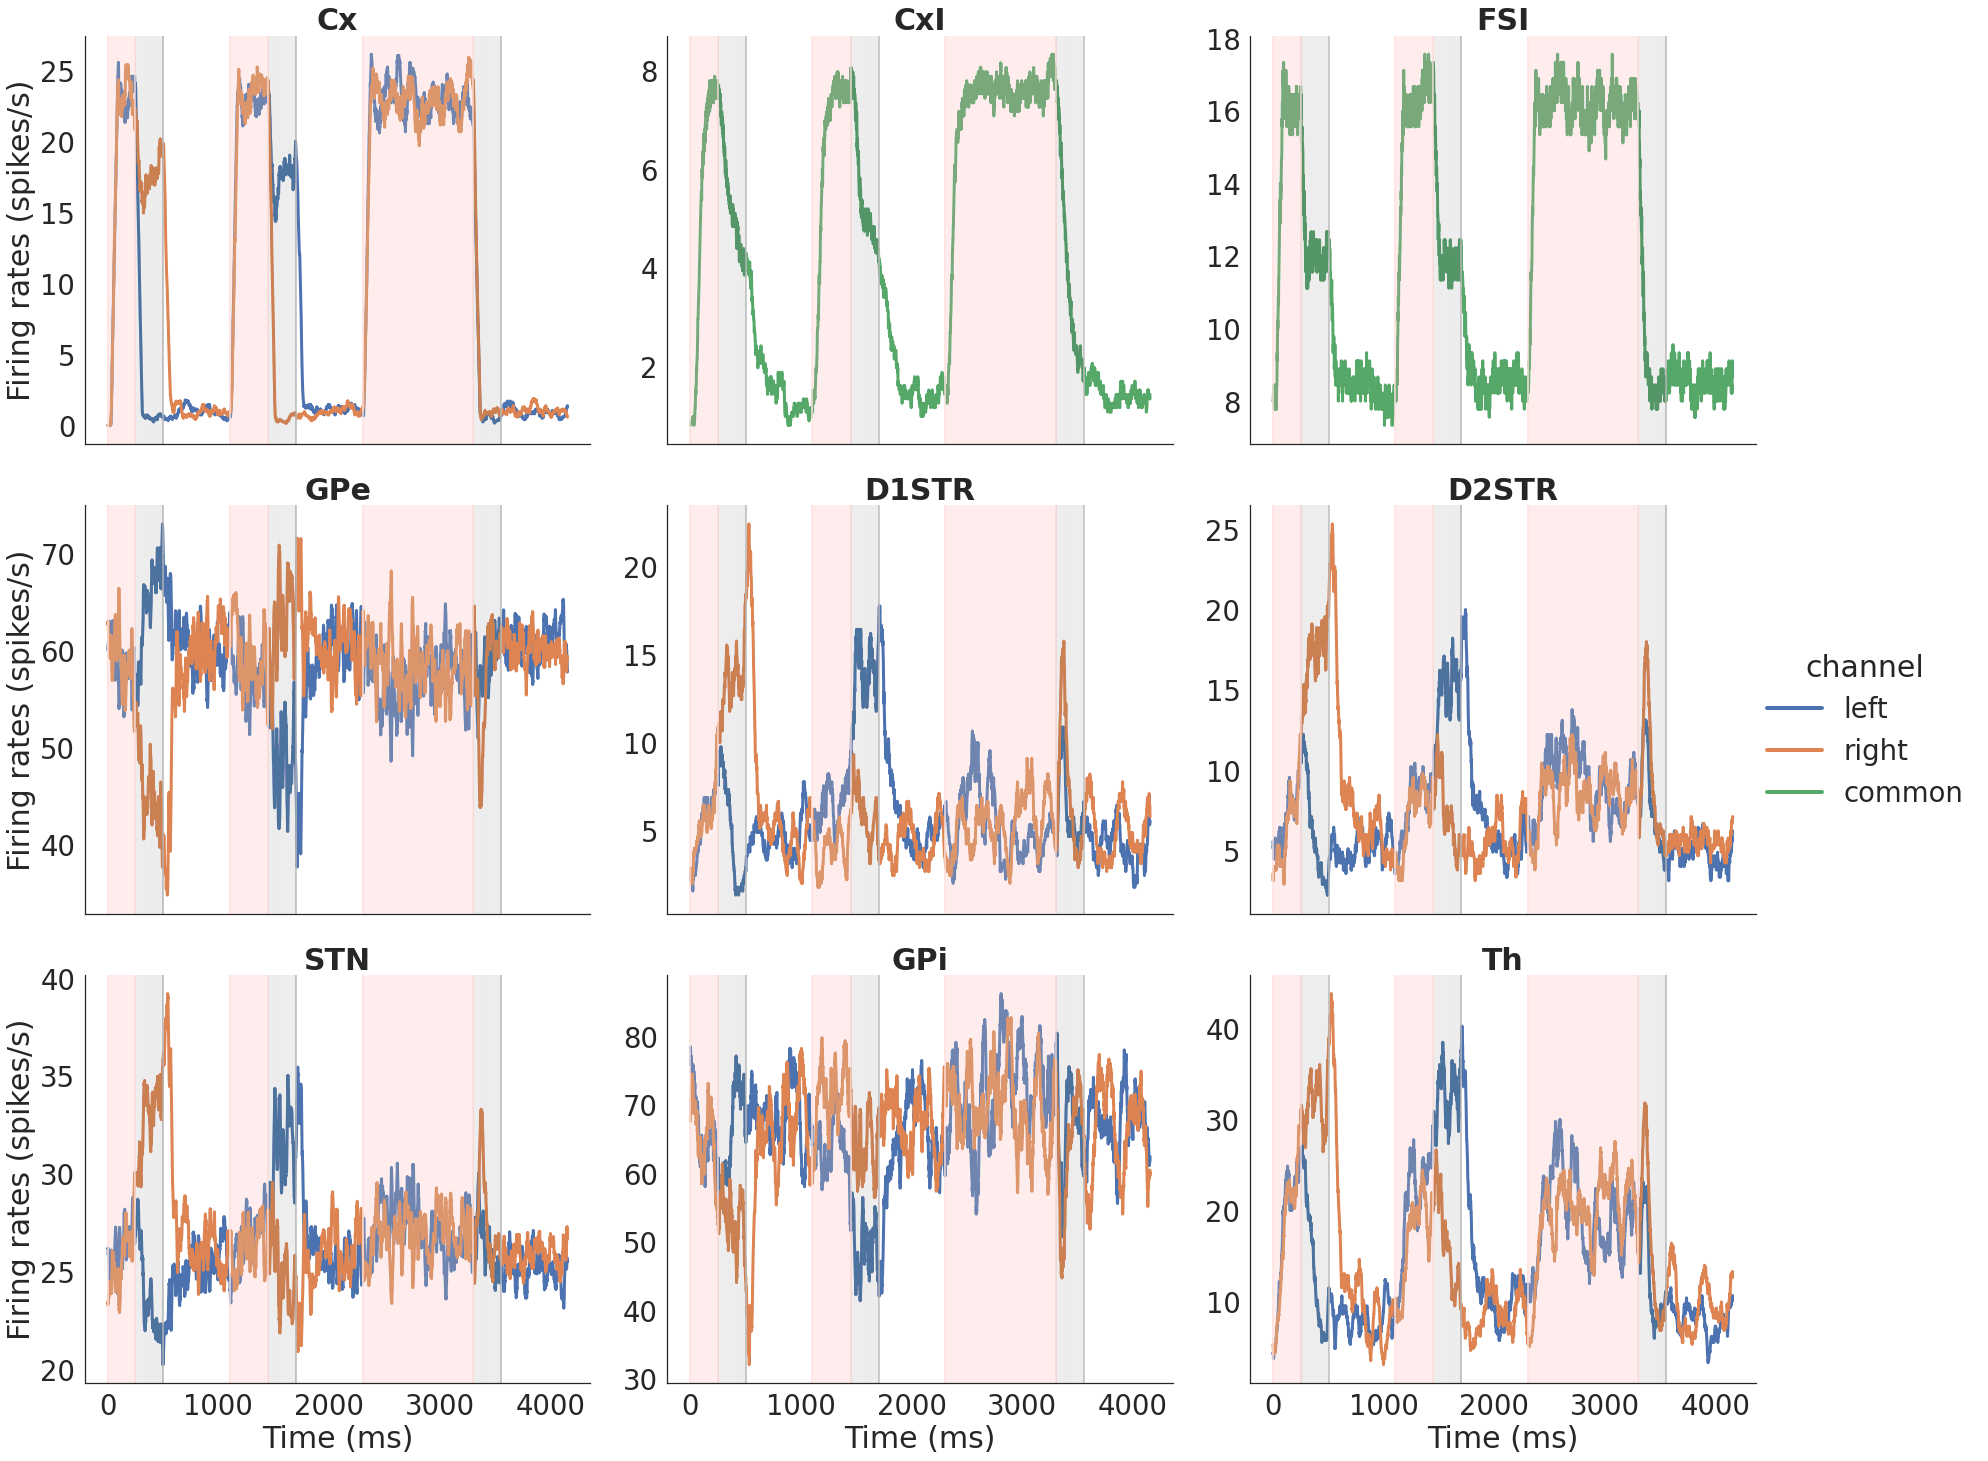

In [85]:
# Plot the firing rates extracted, figure handles are returned in fig_handles

FR_fig_handles = plt_func.plot_fr(firing_rates,datatables,experiment_choice)
FR_fig_handles[0].savefig(figure_dir+"Example_FR_"+postfix+".png",dpi=400)

In [ ]:
FR_fig_handles_zoom = plt_func.plot_fr_flex(firing_rates[0],datatables[0],['all'], [], (0, 500)) 

In [ ]:
reward_fig_handles = plt_func.plot_reward_Q_df(reward_q_df)